In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv("Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
dataset.shape

(30, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


# defining independent (x) and dependent (y) variable

In [ ]:

x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

# spliting the dataset into the training set and test

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [ ]:
x_train.shape

(21, 1)

# fitting simple linear regression to the training set

In [ ]:

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

# predicting the test set results

In [ ]:

y_pred=regressor.predict(x_test)

In [ ]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

# visualising the training set results

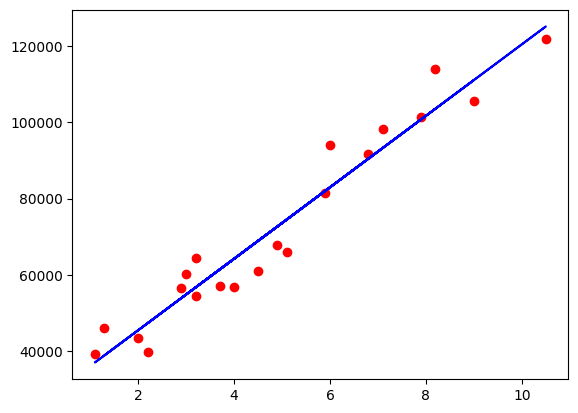

In [ ]:

plt.scatter(x_train,y_train, color="red")
plt.plot(x_train,regressor.predict(x_train),color="blue")

# visualising the test set results

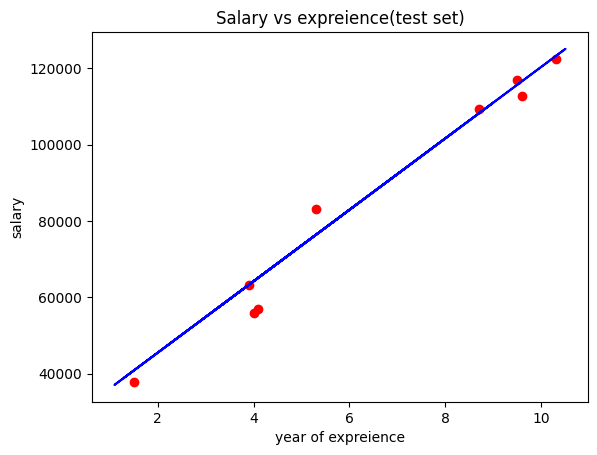

In [ ]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_train,regressor.predict(x_train),color="blue")
plt.title("Salary vs expreience(test set)")
plt.xlabel("year of expreience")
plt.ylabel("salary")
plt.show()

In [ ]:
import joblib
# save the model to a file
joblib.dump(regressor,'prediction of thr salary.pkl')


['prediction of thr salary.pkl']

In [91]:
# @title Default title text
# Step 4: Live prediction
while True:
    try:
        # Get user input
        years_of_experience = float(input("Enter Years of Experience (or type 'exit' to quit): "))

        # Predict the salary
        predicted_salary = regressor.predict([[years_of_experience]])[0]  # Model expects 2D array
        print(f"Predicted Salary for {years_of_experience} years of experience: ${predicted_salary:.2f}")
    except ValueError:
        print("Exiting...")
        break

Enter Years of Experience (or type 'exit' to quit): 3
Predicted Salary for 3.0 years of experience: $54858.18
Enter Years of Experience (or type 'exit' to quit): exist
Exiting...


In [92]:
from sklearn.metrics import mean_squared_error,r2_score

In [93]:
df=pd.read_csv("appliance_energy.csv")
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [94]:
df.shape

(100, 2)

In [95]:
x=df[["Temperature (°C)"]]
y=df["Energy Consumption (kWh)"]

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred=model.predict(x_test)

In [99]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [100]:
MSE=mean_squared_error(y_test,y_pred)
print(f"mean squared error :{MSE}")
r2=r2_score(y_test,y_pred)
print(f"R-squared:{r2}")

mean squared error :0.16342487842925055
R-squared:0.6119478445218713


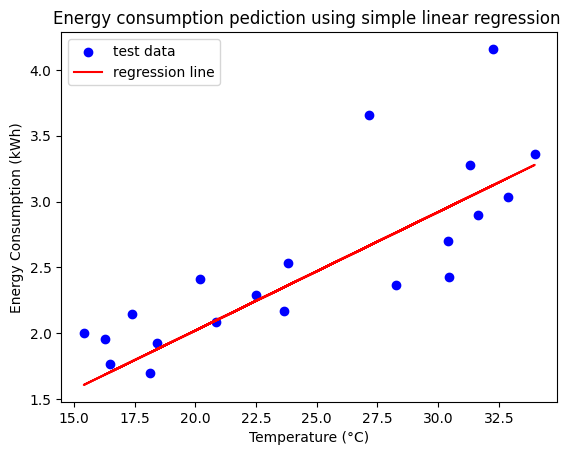

In [101]:
plt.scatter(x_test,y_test,color="blue",label="test data")
plt.plot(x_test,y_pred,color="red",label="regression line")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.title("Energy consumption pediction using simple linear regression ")
plt.show()

In [102]:
import joblib
joblib.dump(model,"application_energy_model.pkl")

['application_energy_model.pkl']

# assumption of linear regression

In [120]:

import pandas as pd
df1=pd.read_csv("data.csv")

In [121]:
df1.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [106]:
x=df1.iloc[:,0:3].values
y=df1.iloc[:,-1].values

In [107]:
x

array([[-5.70562824e-01,  1.42034231e+00,  4.95580395e-01],
       [-9.90562704e-01,  5.56964528e-01,  1.04506399e+00],
       [-6.74727510e-01,  1.50616865e-01,  1.77464503e+00],
       [ 3.88250414e-01, -3.87127181e-01, -1.10229155e-01],
       [ 1.16788229e+00, -2.41044701e-02,  1.45063214e-01],
       [-8.89888979e-01, -1.58094538e+00, -4.22792727e-01],
       [-2.68510868e+00,  1.84207947e-02,  1.72266920e+00],
       [ 6.63187770e-01,  1.85267835e-01, -1.88342383e+00],
       [ 3.19196176e-01, -2.98397020e+00, -1.51521566e+00],
       [-3.48368316e-01, -1.81101917e+00,  7.46891531e-01],
       [-6.37134863e-01, -5.39574612e-01, -4.08345242e-01],
       [ 1.11594518e+00, -3.03033672e-02, -3.19590141e-01],
       [-6.89599657e-01, -3.57440729e-01, -5.41503716e-01],
       [ 2.07087853e+00,  1.06979836e+00,  5.93588115e-01],
       [-7.12849796e-01, -1.50891712e+00, -2.52815988e-01],
       [ 8.87925723e-01, -8.23886105e-01,  4.36232115e-01],
       [-2.94033248e-01, -6.87859510e-01

In [108]:
y

array([  -9.76318213,  -24.02935493,   45.61642069,   34.13573658,
         86.66364674,  -77.89735638,  -75.23160582,  -57.49271113,
        -54.17628622,   29.46983531,  -87.07697894,   61.49707765,
        -87.1908553 ,  189.52586717, -105.60940906,   72.93452847,
         33.37559704, -108.0026368 , -127.03270151,  -97.32244317,
        -56.51293004,  -61.6929032 ,  -46.54502761,  -55.46277415,
         98.27590634,   53.88321804,  -69.66191612,  143.07902342,
       -114.61997528,   31.85127955,  -44.39024034,    1.48968394,
        -88.71622065,   87.12681822,  -17.28585002,  150.20169579,
        -71.41503479, -139.82571896,  190.13399327,  126.78997841,
        191.14039956,  -15.88018358,   79.0476178 ,   32.44367679,
         43.23159853,  -34.70291861,  -94.49899703,   92.90733739,
        -49.79965934, -257.06342658,  -28.33835823,   52.78981793,
       -114.24973574,   31.88367296,   80.14978081,   85.36236114,
        -95.10607425,  -42.28614302,   -2.46076531,  215.04675

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

1.linear relation

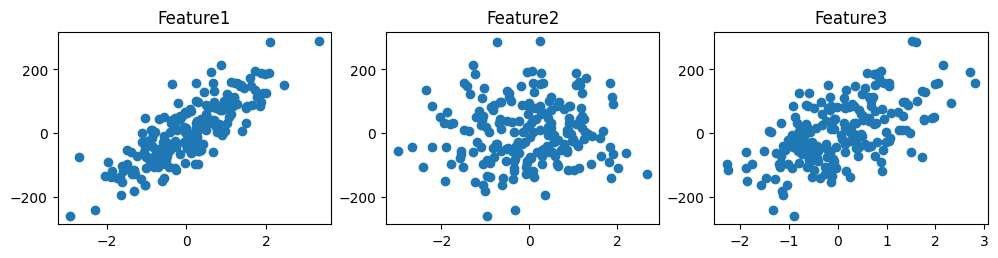

In [112]:

fig, (ax1 ,ax2, ax3)=plt.subplots(ncols=3, figsize=(12,2.5))
ax1.scatter(df1['feature1'],df1['target'])
ax1.set_title("Feature1")

ax2.scatter(df1['feature2'],df1['target'])
ax2.set_title("Feature2")

ax3.scatter(df1['feature3'],df1['target'])
ax3.set_title("Feature3")
plt.show()



2. multicollinearity

In [114]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(x_train.shape[1]):
 vif.append(variance_inflation_factor(x_train,i))
  # close to 5 is bad for vif



In [129]:
pd.DataFrame({'vif':vif},index=df1.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

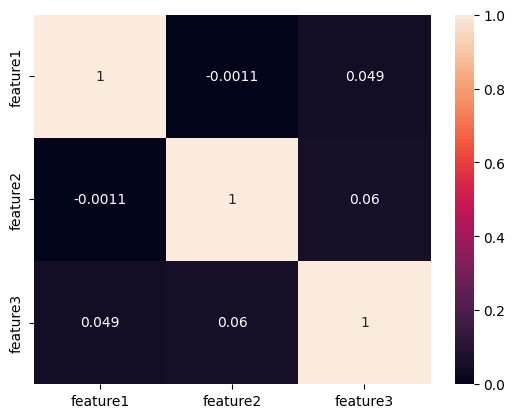

In [131]:
# another Technique
sns.heatmap(df1.iloc[:,0:3].corr(),annot=True)

3. Normality Residual

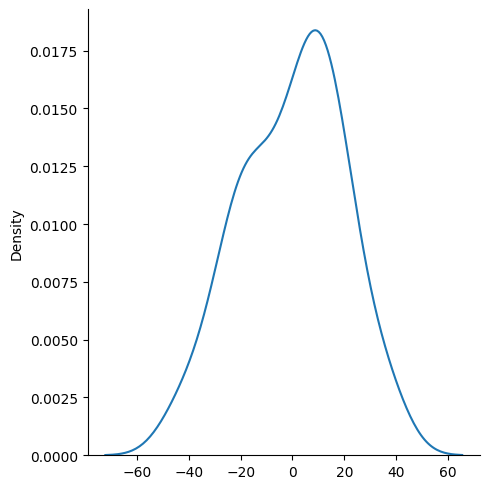

In [140]:
from sklearn.linear_model import LinearRegression
current_model=LinearRegression()
current_model.fit(x_train,y_train)
y_pred_current=current_model.predict(x_test)
residual=y_test-y_pred_current
sns.displot(residual,kind='kde')


# qq plot

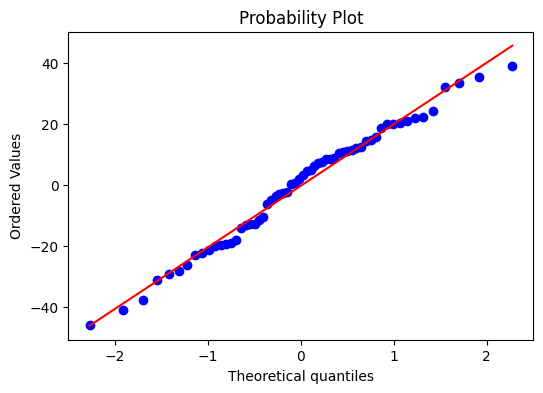

In [134]:

import scipy as sp
fig,ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.show()

4. Homoscedascity

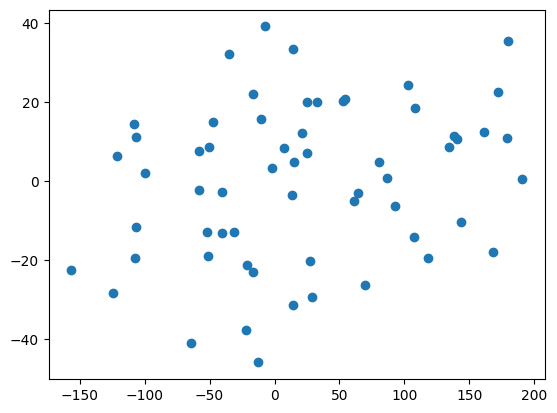

In [139]:

plt.scatter(y_pred_current,residual)

5.  Autocoreelation of Residuals

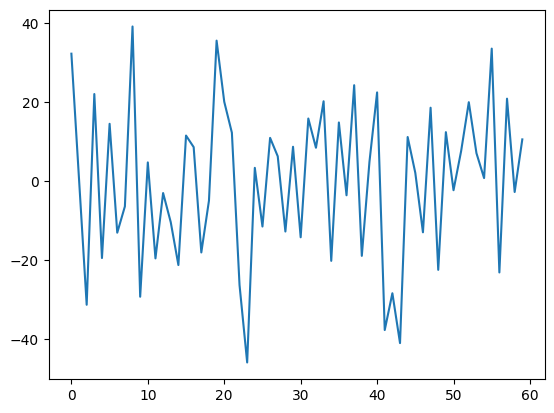

In [137]:

plt.plot(residual)


In [146]:
import pandas as pd
datas=pd.read_csv("polynomial_regression_dataset.csv")

In [147]:
datas.shape

(20, 2)

In [148]:
datas.head()

,Temperature,Pressure
0,10.000000,6.993428
1,14.736842,4.526795
2,19.473684,5.350779
3,24.210526,6.802292
4,28.947368,3.437510


In [150]:
x=datas[["Temperature"]]
y=datas["Pressure"]

In [151]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x,y)

LinearRegression()

In [153]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)
lin2=LinearRegression()
lin2.fit(x_poly,y)


LinearRegression()

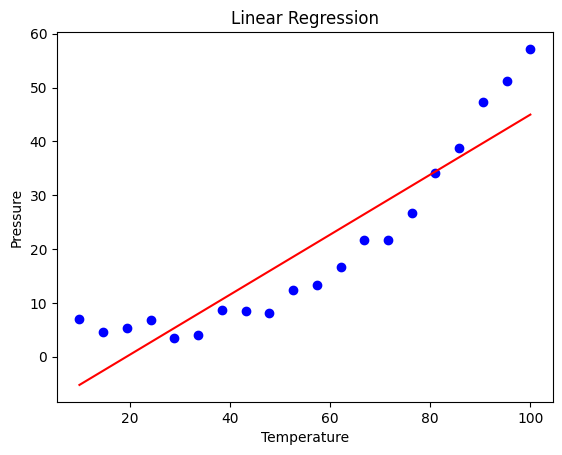

In [155]:
plt.scatter(x,y,color="blue")
plt.plot(x,lin.predict(x),color="red")
plt.title("Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()

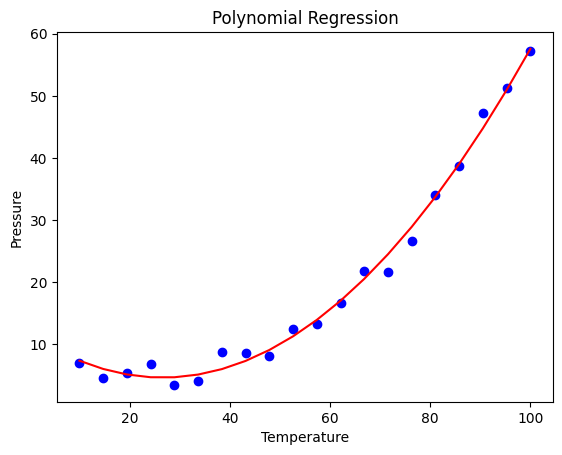

In [158]:
plt.scatter(x,y,color="blue")
plt.plot(x,lin2.predict(poly.fit_transform(x)),
color="red")
plt.title("Polynomial Regression")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [159]:
data=pd.read_csv("sustainability_data.csv")

In [160]:
x=data[["Energy_Consumption",'Renewable_Percentage',"GDP"]]
Y=data['CO2_Emissions']

x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

In [163]:
poly=PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.transform(x_test)

In [164]:
model=LinearRegression()
model.fit(x_poly_train,y_train)

LinearRegression()

In [165]:
y_pred=model.predict(x_poly_test)

In [166]:
y_pred

array([ 734.07298491,  874.62164867,  947.22015401,  858.08950479,
       1027.78382866])

In [167]:
from sklearn.metrics import mean_squared_error,r2_score
MSE=mean_squared_error(y_test,y_pred)
print(f"mean squared error :{MSE}")
r2=r2_score(y_test,y_pred)
print(f"R-squared:{r2}")

mean squared error :2341.1134159353965
R-squared:0.06978468406875404


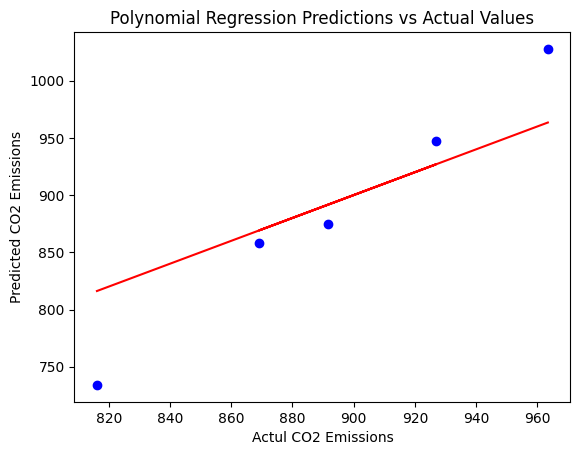

In [170]:
plt.scatter(y_test,y_pred,color="blue")
plt.plot(y_test,y_test,color="red")
plt.xlabel("Actul CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Polynomial Regression Predictions vs Actual Values")
plt.show()